In [1]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
booksdata = pd.read_csv(r'book.csv')


In [3]:
booksdata.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
booksdata.shape

(2000, 11)

In [5]:
booksdata.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [6]:
booksdata.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
booksdata.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Set the minimum support and confidence thresholds
min_support = [0.05, 0.1, 0.15, 0.2]
min_confidence = [0.5, 0.6, 0.7, 0.8]

In [11]:
# Generate the frequent itemsets and association rules for each combination of thresholds
for s in min_support:
  for c in min_confidence:
    frequent_itemsets = apriori(booksdata, min_support=s, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=c)
    print("Support:", s, "Confidence:", c, "Number of Rules:", len(rules))


Support: 0.05 Confidence: 0.5 Number of Rules: 260
Support: 0.05 Confidence: 0.6 Number of Rules: 135
Support: 0.05 Confidence: 0.7 Number of Rules: 87
Support: 0.05 Confidence: 0.8 Number of Rules: 62
Support: 0.1 Confidence: 0.5 Number of Rules: 49
Support: 0.1 Confidence: 0.6 Number of Rules: 30
Support: 0.1 Confidence: 0.7 Number of Rules: 19
Support: 0.1 Confidence: 0.8 Number of Rules: 6
Support: 0.15 Confidence: 0.5 Number of Rules: 12
Support: 0.15 Confidence: 0.6 Number of Rules: 11
Support: 0.15 Confidence: 0.7 Number of Rules: 3
Support: 0.15 Confidence: 0.8 Number of Rules: 0
Support: 0.2 Confidence: 0.5 Number of Rules: 2
Support: 0.2 Confidence: 0.6 Number of Rules: 1
Support: 0.2 Confidence: 0.7 Number of Rules: 0
Support: 0.2 Confidence: 0.8 Number of Rules: 0


In [14]:
# Task 2: Change the minimum length in apriori algorithm.

# Generate the frequent itemsets and association rules with a minimum itemset length of 2
frequent_itemsets = apriori(booksdata, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# use the min_len parameter to filter the rules by minimum length
rules = rules[rules["antecedents"].apply(len) >= 2]


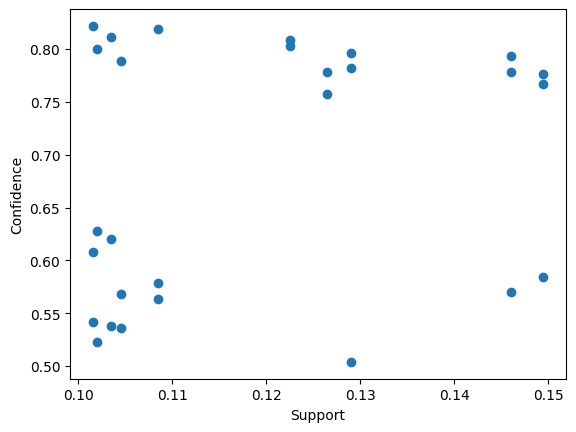

In [15]:
# Task 3: Visualize the obtained rules using different plots.

# Plot a scatterplot of the support and confidence values of the association rules
plt.scatter(rules["support"], rules["confidence"])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()


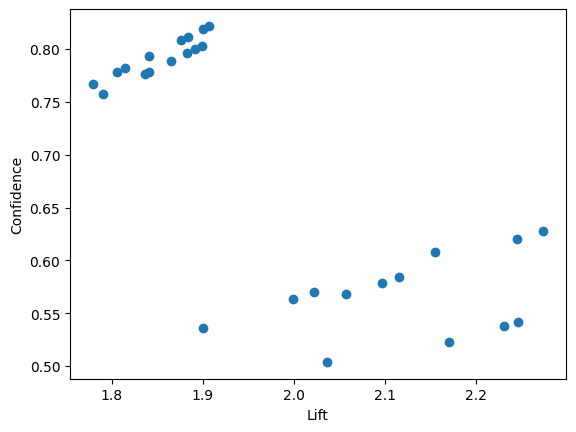

In [16]:

# Plot a scatterplot of the lift and confidence values of the association rules
plt.scatter(rules["lift"], rules["confidence"])
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()



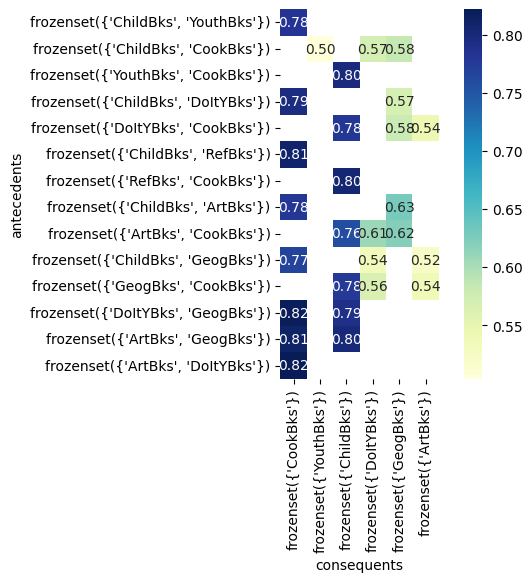

In [17]:
# Plot a heatmap of the support and confidence values of the association rules
sns.heatmap(data=pd.pivot_table(rules, index="antecedents", columns="consequents", values="confidence"), cmap="YlGnBu", square=True, annot=True, fmt=".2f")
plt.show()